# An Analysis of Stock Prices.

### Business understanding
The SP500.csv dataset contains historical data on the stock prices of the top 500 companies listed on the New York Stock Exchange (NYSE) and NASDAQ. As a data scientist, our goal is to use this dataset to gain insights into the stock market trends and help investors make informed decisions.

### Problem statement
With the volatility of the stock market, investors are often looking for ways to make data-driven decisions about their investments. However, analyzing large amounts of stock market data can be time-consuming and overwhelming. Therefore, the problem statement is to create a model that can analyze the stock prices of the top 500 companies and provide valuable insights to investors.



### Solution
Our solution to the problem statement is to use machine learning algorithms and statistical analysis to create a predictive model that can identify trends and patterns in the stock market data. We will also perform data visualization to present the insights in an easy-to-understand format. By using this approach, we can help investors make informed decisions based on historical data and current trends in the stock market.

#### Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import sklearn
import tensorflow as tf

from sklearn import datasets
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_dir = 'sp500.csv'
df = pd.read_csv(data_dir)

Read Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4697 entries, 0 to 4696
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4697 non-null   object 
 1   Open    4697 non-null   float64
 2   High    4697 non-null   float64
 3   Low     4697 non-null   float64
 4   Close   4697 non-null   float64
 5   Volume  4697 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 220.3+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [ ]:
data_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

no null data

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,4697.000000,4697.000000,4697.000000,4697.000000,4.697000e+03
mean,1482.568296,1491.141438,1473.341761,1482.764537,3.053978e+09
std,487.313638,487.480250,487.187033,487.468657,1.508356e+09
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08
25%,1139.930054,1147.459961,1131.810059,1139.930054,1.593820e+09
50%,1330.290039,1338.209961,1321.890015,1329.780029,3.152470e+09
75%,1806.550049,1811.079956,1801.349976,1807.229980,3.920750e+09
max,2908.939941,2916.500000,2898.399902,2914.040039,1.145623e+10


#### Visualization

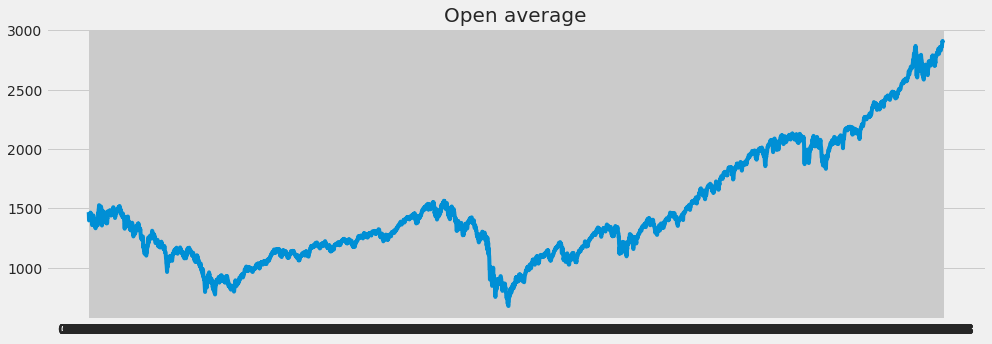

In [ ]:
dates = data_train['Date'].values
temp  = data_train['Open'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Open average',
          fontsize=20);

split data into data train data test

In [ ]:
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

In [ ]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
list(y)

[0, 1, 2, 3, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
n_cols = 1
dataset = df["Open"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(4697, 1)

Using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

The validation set is 20% of the total dataset

In [ ]:
train_size = int(len(data) * 20/100)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 939 Test Size : 3758


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(939, 1)

In [ ]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.35430066],
       [0.3480082 ],
       [0.322982  ],
       [0.32418843],
       [0.32478941],
       [0.34184134],
       [0.34907563],
       [0.34053625],
       [0.3377062 ],
       [0.34552356],
       [0.35246182],
       [0.34797234],
       [0.34831321],
       [0.34368018],
       [0.34179202],
       [0.32392832],
       [0.32774057],
       [0.32507645],
       [0.3225963 ],
       [0.30537393],
       [0.32075741],
       [0.32740419],
       [0.32733242],
       [0.33444111],
       [0.33417202],
       [0.33411372],
       [0.34195347],
       [0.32848952],
       [0.33079033],
       [0.31746544],
       [0.31873018],
       [0.32416155],
       [0.31771214],
       [0.31797674],
       [0.29906352],
       [0.30179043],
       [0.30561159],
       [0.30235554],
       [0.29335414],
       [0.29994261],
       [0.30818154],
       [0.31390882],
       [0.31506149],
       [0.32735486],
       [0.31933121],
       [0.30333773],
       [0.30830707],
  

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [ ]:
x_train.shape , y_train.shape

((4637, 60, 1), (4637, 1))

In [ ]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
minMae = (df['Open'].max() - df['Open'].min()) * 10/100
good_mae = minMae
good_mae

222.9659912

In [ ]:
history = model.fit(x_train, y_train, epochs= 5, batch_size= 32)

Epoch 1/5
145/145 [==============================] - 9s 62ms/step - loss: 1.5156e-04 - mae: 0.0124
Epoch 2/5
145/145 [==============================] - 9s 61ms/step - loss: 1.4853e-04 - mae: 0.0124
Epoch 3/5
145/145 [==============================] - 9s 61ms/step - loss: 1.4599e-04 - mae: 0.0123
Epoch 4/5
145/145 [==============================] - 9s 61ms/step - loss: 1.4390e-04 - mae: 0.0122
Epoch 5/5
145/145 [==============================] - 9s 62ms/step - loss: 1.4219e-04 - mae: 0.0122


The output shows a loss value of 1.4219e-04 and an MAE (mean absolute error) of 0.0122. Loss values ​​that are closer to zero and smaller MAE values ​​indicate that the model is capable of making predictions with high accuracy.

To explain the output results in more detail, the loss value shows how accurate the model is in predicting stock prices based on the data provided. The smaller the loss value, the more accurate the predictions produced by the model. The MAE value shows how much the difference is between the predicted value and the actual value of the stock price in dollars. The smaller the MAE value, the closer the predicted value is to the actual value.

However, to evaluate whether the model can be used to predict future stock prices, it is necessary to carry out further evaluation using data that the model has never seen. In addition, in conducting stock analysis it is also necessary to consider other factors such as market conditions, company policies, and global economic factors that can affect stock prices.